In [746]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
df = pd.read_csv('bachelor.csv')

In [747]:
#Look at the data
df

,order,season,id,Bachelorettes,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,first_impression_rose,top3,trait_A,age
0,1,10,Alexis_s10,Alexis,Stephanie T.,Stephanie T.,Bevin,Amber,Bevin,Tessa,Bevin,Tessa,NaN,NaN,0,0,3,26
1,2,10,Nicole_s10,Nicole,Peyton,Tessa,Tessa,Tessa,Amber,Bevin,Tessa,NaN,NaN,NaN,0,0,3,26
2,3,10,Amanda_s10,Amanda,Bevin,Danielle I.,Amber,Danielle I.,Tessa,Danielle I.,NaN,NaN,NaN,NaN,0,0,2,26
3,4,10,Peyton_s10,Peyton,Kate,Bevin,Danielle I.,Bevin,Danielle I.,NaN,NaN,NaN,NaN,NaN,0,0,3,24
4,5,10,Catherine_s10,Catherine,Alexis,Amber,Stephanie W.,Tina,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,26,26,Elizabeth_s26,Elizabeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,32
473,27,26,Hunter_s26,Hunter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,28
474,28,26,Samantha_s26,Samantha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,26
475,29,26,Cassidy_s26,Cassidy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,26


In [748]:
#Create a new df to concatentate future dfs on.
setup_df = pd.DataFrame(columns=['order', 'season', 'id', 'Bachelorettes', 'Week1', 'Week2', 'Week3',
       'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10',
       'first_impression_rose', 'top3', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank',
       'Wk3Rank', 'Wk4Rank', 'Wk5Rank', 'Wk6Rank', 'Wk7Rank', 'Wk8Rank',
       'Wk9Rank', 'Wk10Rank'])
setup_df

,order,season,id,Bachelorettes,Week1,Week2,Week3,Week4,Week5,Week6,...,Wk1Rank,Wk2Rank,Wk3Rank,Wk4Rank,Wk5Rank,Wk6Rank,Wk7Rank,Wk8Rank,Wk9Rank,Wk10Rank


In [749]:
#Get callout orders of contestants, add them to new columns, and concatenate with the setup_df
pd.options.mode.chained_assignment = None
new_df = df.copy()
ranknames = ['Wk1Rank', 'Wk2Rank','Wk3Rank', 'Wk4Rank', 'Wk5Rank', 'Wk6Rank', 'Wk7Rank', 'Wk8Rank','Wk9Rank', 'Wk10Rank']
weeks = ['Week1', 'Week2', 'Week3', 'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10']
for j in ranknames:
    #By default set values to 0, unless told otherwise below
    new_df[j] = np.repeat(0, len(new_df))

for season in new_df['season'].unique():  
    season_df = new_df[new_df['season'] == season]

    for z, week in enumerate(weeks):
        globals()[f'callouts{z}'] = season_df[week].to_list()
        #callouts = season_df['Week1'].to_list()
    for i, x in enumerate(season_df.Bachelorettes):
        try:
            season_df['Wk1Rank'].iloc[i] = callouts0.index(x)+1
            season_df['Wk2Rank'].iloc[i] = callouts1.index(x)+1
            season_df['Wk3Rank'].iloc[i] = callouts2.index(x)+1
            season_df['Wk4Rank'].iloc[i] = callouts3.index(x)+1
            season_df['Wk5Rank'].iloc[i] = callouts4.index(x)+1
            season_df['Wk6Rank'].iloc[i] = callouts5.index(x)+1
            season_df['Wk7Rank'].iloc[i] = callouts6.index(x)+1
            season_df['Wk8Rank'].iloc[i] = callouts7.index(x)+1
            season_df['Wk9Rank'].iloc[i] = callouts8.index(x)+1
            season_df['Wk10Rank'].iloc[i] = callouts9.index(x)+1
        except ValueError:
            pass
    setup_df = pd.concat([setup_df, season_df])

setup_df.head(15)
pd.options.mode.chained_assignment = 'warn'


In [750]:
#Verify which columns we want to use to find week they were eliminated
setup_df.iloc[:,18:]

,Wk1Rank,Wk2Rank,Wk3Rank,Wk4Rank,Wk5Rank,Wk6Rank,Wk7Rank,Wk8Rank,Wk9Rank,Wk10Rank
0,5,0,0,0,0,0,0,0,0,0
1,10,8,8,0,0,0,0,0,0,0
2,12,11,0,0,0,0,0,0,0,0
3,2,10,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
472,10,17,0,0,0,0,0,0,0,0
473,21,15,13,11,0,0,0,0,0,0
474,0,0,0,0,0,0,0,0,0,0
475,9,0,0,0,0,0,0,0,0,0


In [751]:
#Get week eliminated and make a new column
list1 = []
for i in range(setup_df.iloc[:,18:].shape[0]):
    value = setup_df.iloc[:,18:].iloc[i]
    list2 = []
    for j in value:
        if j > 0:
            list2.append(j)
        else:
            pass
    list1.append(len(list2)+1)
setup_df['week_eliminated'] = list1

In [752]:
setup_df.head()

,order,season,id,Bachelorettes,Week1,Week2,Week3,Week4,Week5,Week6,...,Wk2Rank,Wk3Rank,Wk4Rank,Wk5Rank,Wk6Rank,Wk7Rank,Wk8Rank,Wk9Rank,Wk10Rank,week_eliminated
0,1,10,Alexis_s10,Alexis,Stephanie T.,Stephanie T.,Bevin,Amber,Bevin,Tessa,...,0,0,0,0,0,0,0,0,0,2
1,2,10,Nicole_s10,Nicole,Peyton,Tessa,Tessa,Tessa,Amber,Bevin,...,8,8,0,0,0,0,0,0,0,4
2,3,10,Amanda_s10,Amanda,Bevin,Danielle I.,Amber,Danielle I.,Tessa,Danielle I.,...,11,0,0,0,0,0,0,0,0,3
3,4,10,Peyton_s10,Peyton,Kate,Bevin,Danielle I.,Bevin,Danielle I.,NaN,...,10,0,0,0,0,0,0,0,0,3
4,5,10,Catherine_s10,Catherine,Alexis,Amber,Stephanie W.,Tina,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [753]:
#Replace the zeroes with max values of 16
for rank in ranknames:
    setup_df[rank].replace(to_replace=0, value = 16, inplace=True)

In [754]:
setup_df.head(20)

,order,season,id,Bachelorettes,Week1,Week2,Week3,Week4,Week5,Week6,...,Wk2Rank,Wk3Rank,Wk4Rank,Wk5Rank,Wk6Rank,Wk7Rank,Wk8Rank,Wk9Rank,Wk10Rank,week_eliminated
0,1,10,Alexis_s10,Alexis,Stephanie T.,Stephanie T.,Bevin,Amber,Bevin,Tessa,...,16,16,16,16,16,16,16,16,16,2
1,2,10,Nicole_s10,Nicole,Peyton,Tessa,Tessa,Tessa,Amber,Bevin,...,8,8,16,16,16,16,16,16,16,4
2,3,10,Amanda_s10,Amanda,Bevin,Danielle I.,Amber,Danielle I.,Tessa,Danielle I.,...,11,16,16,16,16,16,16,16,16,3
3,4,10,Peyton_s10,Peyton,Kate,Bevin,Danielle I.,Bevin,Danielle I.,NaN,...,10,16,16,16,16,16,16,16,16,3
4,5,10,Catherine_s10,Catherine,Alexis,Amber,Stephanie W.,Tina,NaN,NaN,...,16,16,16,16,16,16,16,16,16,1
5,6,10,Amber_s10,Amber,Danielle I.,Stephanie W.,Tina,Stephanie W.,NaN,NaN,...,5,3,1,2,16,16,16,16,16,6
6,7,10,Blakeney_s10,Blakeney,Amber,Kate,Kate,NaN,NaN,NaN,...,16,16,16,16,16,16,16,16,16,1
7,8,10,Danielle V._s10,Danielle V.,Tiffany W.,Nicole,Nicole,NaN,NaN,NaN,...,16,16,16,16,16,16,16,16,16,1
8,9,10,Jackie_s10,Jackie,Tessa,Tina,Stephanie T.,NaN,NaN,NaN,...,16,16,16,16,16,16,16,16,16,1
9,10,10,Stephanie W._s10,Stephanie W.,Nicole,Peyton,NaN,NaN,NaN,NaN,...,6,5,6,16,16,16,16,16,16,5


In [755]:
setup_df.columns

Index(['order', 'season', 'id', 'Bachelorettes', 'Week1', 'Week2', 'Week3',
       'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10',
       'first_impression_rose', 'top3', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank',
       'Wk3Rank', 'Wk4Rank', 'Wk5Rank', 'Wk6Rank', 'Wk7Rank', 'Wk8Rank',
       'Wk9Rank', 'Wk10Rank', 'week_eliminated'],
      dtype='object')

In [756]:
y = setup_df['top3'].values
x = setup_df[['first_impression_rose', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank', 'Wk3Rank', 'Wk4Rank',
       'Wk5Rank', 'Wk6Rank', 'Wk7Rank', 'Wk8Rank', 'Wk9Rank', 'Wk10Rank']]
x2 = setup_df[['first_impression_rose', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank', 'Wk3Rank', 'Wk4Rank',
       'Wk5Rank']]

In [757]:
x

,first_impression_rose,trait_A,age,Wk1Rank,Wk2Rank,Wk3Rank,Wk4Rank,Wk5Rank,Wk6Rank,Wk7Rank,Wk8Rank,Wk9Rank,Wk10Rank
0,0,3,26,5,16,16,16,16,16,16,16,16,16
1,0,3,26,10,8,8,16,16,16,16,16,16,16
2,0,2,26,12,11,16,16,16,16,16,16,16,16
3,0,3,24,2,10,16,16,16,16,16,16,16,16
4,0,3,23,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0,3,32,10,17,16,16,16,16,16,16,16,16
473,0,2,28,21,15,13,11,16,16,16,16,16,16
474,0,3,26,16,16,16,16,16,16,16,16,16,16
475,0,3,26,9,16,16,16,16,16,16,16,16,16


In [758]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y, test_size=0.5)
lin_reg = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg.fit(xtrain, ytrain)
lin_reg2.fit(xtrain2, ytrain2)

LinearRegression()

In [759]:
pred = lin_reg.predict(xtest)
pred2 = lin_reg2.predict(xtest2)

In [760]:
from sklearn.metrics import accuracy_score, mean_squared_error
mse1 = mean_squared_error(ytest, pred, squared=False)
mse2 = mean_squared_error(ytest2, pred2, squared=False)
print("mse1: ", mse1, ", mse2: ", mse2)

mse1:  0.2112808395902217 , mse2:  0.2754961950453955


In [761]:
df.columns

Index(['order', 'season', 'id', 'Bachelorettes', 'Week1', 'Week2', 'Week3',
       'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10',
       'first_impression_rose', 'top3', 'trait_A', 'age'],
      dtype='object')

<AxesSubplot:xlabel='first_impression_rose', ylabel='week_eliminated'>

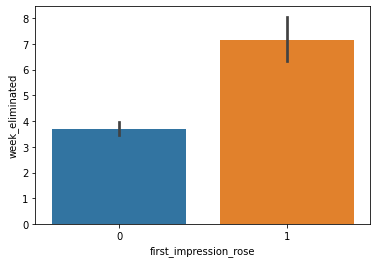

In [762]:
#People who get the first impression rose tend to get eliminated later in the competition
sns.barplot(x = 'first_impression_rose', y = 'week_eliminated', data = setup_df)

In [763]:
from sklearn.metrics import accuracy_score, mean_squared_error
mse1 = mean_squared_error(ytest, pred, squared=False)
mse2 = mean_squared_error(ytest2, pred2, squared=False)
print("mse1: ", mse1, ", mse2: ", mse2)

mse1:  0.2112808395902217 , mse2:  0.2754961950453955


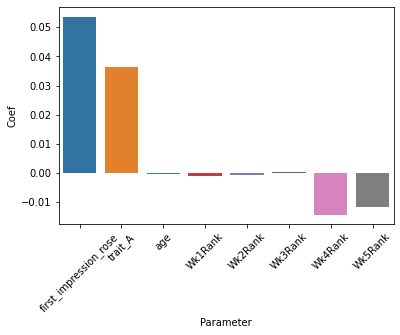

In [764]:
#If we were guessing the final 3 only based on information through week 5, then anybody who got the first impression rose would be more likely to get final 3
coefficients = list(zip(x.columns, lin_reg.coef_))
coefficients2 = list(zip(x.columns, lin_reg2.coef_))

coefficients = pd.DataFrame(coefficients, columns = ['Parameter', 'Coef'])
coefficients2 = pd.DataFrame(coefficients2, columns = ['Parameter', 'Coef'])

sns.barplot(x = 'Parameter', y = 'Coef', data = coefficients2)
plt.xticks(rotation = 45)
plt.show()

In [765]:
x.corr()

,Wk1Rank,Wk2Rank,Wk3Rank,Wk4Rank,Wk5Rank,Wk6Rank,Wk7Rank,Wk8Rank,Wk9Rank,Wk10Rank
Wk1Rank,1.000000,0.514928,0.476077,0.434311,0.433965,0.392248,0.330285,0.250605,0.138573,0.172647
Wk2Rank,0.514928,1.000000,0.613566,0.595275,0.571102,0.492795,0.397803,0.306485,0.196576,0.148958
Wk3Rank,0.476077,0.613566,1.000000,0.768420,0.644336,0.576001,0.490950,0.414589,0.306073,0.239592
Wk4Rank,0.434311,0.595275,0.768420,1.000000,0.814955,0.729451,0.574384,0.441287,0.330851,0.235929
Wk5Rank,0.433965,0.571102,0.644336,0.814955,1.000000,0.819700,0.654897,0.505393,0.372981,0.261503
Wk6Rank,0.392248,0.492795,0.576001,0.729451,0.819700,1.000000,0.785144,0.627380,0.446204,0.302282
Wk7Rank,0.330285,0.397803,0.490950,0.574384,0.654897,0.785144,1.000000,0.793161,0.564880,0.411308
Wk8Rank,0.250605,0.306485,0.414589,0.441287,0.505393,0.627380,0.793161,1.000000,0.717101,0.526224
Wk9Rank,0.138573,0.196576,0.306073,0.330851,0.372981,0.446204,0.564880,0.717101,1.000000,0.704926
Wk10Rank,0.172647,0.148958,0.239592,0.235929,0.261503,0.302282,0.411308,0.526224,0.704926,1.000000


<AxesSubplot:>

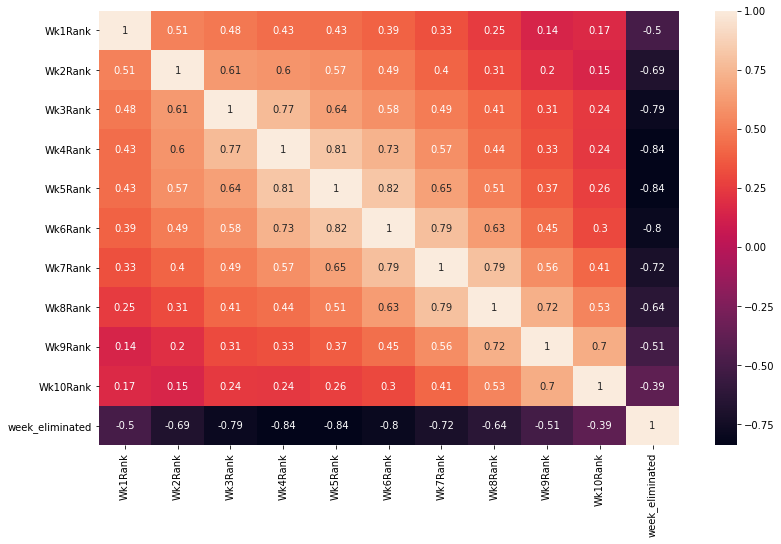

In [766]:
#My own 'trait_A' is not as correlated with being top 3 as is the first impression rose.
plt.figure(figsize = (13, 8))
sns.heatmap(setup_df.corr(), annot=True)

In [767]:
#Let's do a decision tree next.

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [768]:
x3 = setup_df[['first_impression_rose', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank', 'Wk3Rank']]
y = setup_df['top3'].values
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3, y, test_size = 0.3)

In [769]:
y = y.astype('int')

In [770]:
tree_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
tree_clf.fit(x3, y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [771]:
x.columns

Index(['first_impression_rose', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank',
       'Wk3Rank', 'Wk4Rank', 'Wk5Rank', 'Wk6Rank', 'Wk7Rank', 'Wk8Rank',
       'Wk9Rank', 'Wk10Rank'],
      dtype='object')

[Text(856.9285714285713, 684.9359999999999, 'Wk3Rank <= 11.5\ngini = 0.171\nsamples = 477\nvalue = [432, 45]\nclass = Not top 3'),
 Text(438.4285714285714, 532.728, 'Wk1Rank <= 3.5\ngini = 0.371\nsamples = 175\nvalue = [132, 43]\nclass = Not top 3'),
 Text(159.42857142857142, 380.52, 'Wk2Rank <= 3.5\ngini = 0.498\nsamples = 43\nvalue = [23, 20]\nclass = Not top 3'),
 Text(79.71428571428571, 228.312, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = Top 3'),
 Text(239.1428571428571, 228.312, 'Wk3Rank <= 3.5\ngini = 0.472\nsamples = 34\nvalue = [21, 13]\nclass = Not top 3'),
 Text(159.42857142857142, 76.10399999999993, 'gini = 0.492\nsamples = 16\nvalue = [7, 9]\nclass = Top 3'),
 Text(318.85714285714283, 76.10399999999993, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]\nclass = Not top 3'),
 Text(717.4285714285713, 380.52, 'Wk3Rank <= 5.5\ngini = 0.288\nsamples = 132\nvalue = [109, 23]\nclass = Not top 3'),
 Text(558.0, 228.312, 'age <= 23.5\ngini = 0.395\nsamples = 59\nvalue = [43, 16]

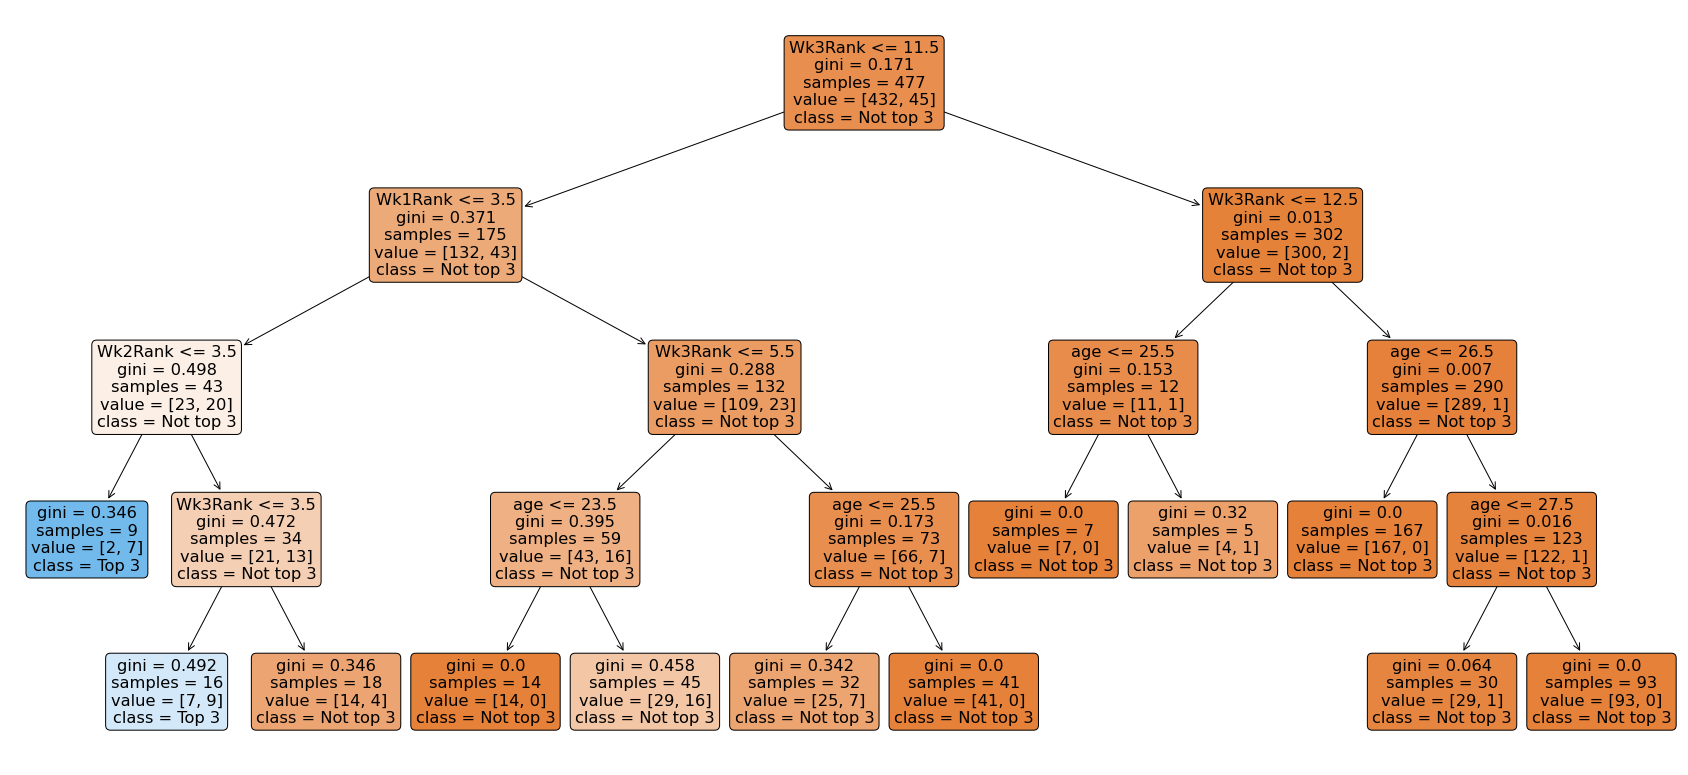

In [772]:
plt.figure(figsize = (30, 14))
tree.plot_tree(tree_clf, filled = True, rounded=True, feature_names=x.columns, class_names=['Not top 3', 'Top 3'])

If a contestant is not given a rose 11th or sooner in Week 3, their chance of getting top 3 is less than 1%.
<p>
If a contestant is given the 3rd rose or sooner in weeks 1 and week 2, their <b>chance of getting top 3 is 78%!</b>. This shows how important early dates are.</p>
<p>If a contestant gets called top 11 in Week 3, but does not get called in top 3 in Week 1, if they are not called in top 5, they need to be 25 or younger to get a rose; if they are called in top 5, they need to be 24 or over to get a rose.

In [773]:
lin_reg3 = LinearRegression()
lin_reg3.fit(xtrain3, ytrain3)
ypred3 = lin_reg3.predict(xtest3)

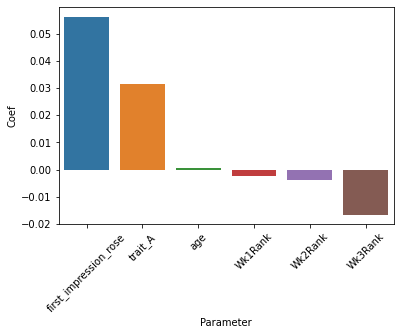

In [774]:
coefficients3 = list(zip(x3.columns, lin_reg3.coef_))
coefficients3 = pd.DataFrame(coefficients3, columns = ['Parameter', 'Coef'])
sns.barplot(x = 'Parameter', y = 'Coef', data = coefficients3)
plt.xticks(rotation = 45)
plt.show()

In [775]:
setup_df.columns

Index(['order', 'season', 'id', 'Bachelorettes', 'Week1', 'Week2', 'Week3',
       'Week4', 'Week5', 'Week6', 'Week7', 'Week8', 'Week9', 'Week10',
       'first_impression_rose', 'top3', 'trait_A', 'age', 'Wk1Rank', 'Wk2Rank',
       'Wk3Rank', 'Wk4Rank', 'Wk5Rank', 'Wk6Rank', 'Wk7Rank', 'Wk8Rank',
       'Wk9Rank', 'Wk10Rank', 'week_eliminated'],
      dtype='object')

(0.0, 12.0)

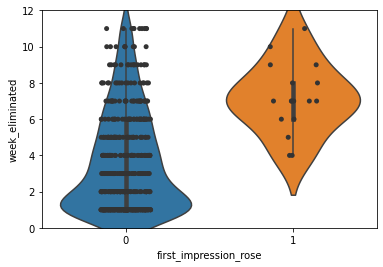

In [776]:
#The first impression rose is an indicator for going the distance, but not necessarily for winning or even top 3. They tend to stay through around half the show.

sns.violinplot(x = 'first_impression_rose', y = 'week_eliminated', data = setup_df)
sns.stripplot(x = 'first_impression_rose', y = 'week_eliminated', data = setup_df, jitter = 0.15, color = '.2')
plt.ylim([0, 12])

<AxesSubplot:xlabel='age', ylabel='Count'>

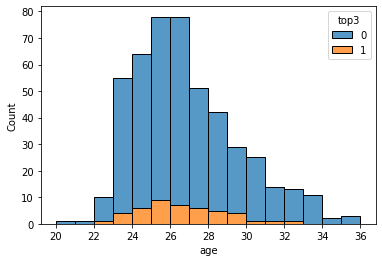

In [777]:
#Top 3 seems to be distributed closely with the age distribution
sns.histplot(x = 'age', hue = 'top3', data = setup_df, multiple='stack')